# 4HFI H235 Investigation

In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import MDAnalysis as mda
from statistics import mode
import ast
import msmexplorer as msme
from msmbuilder.utils import load,dump
import itertools
from msmbuilder.featurizer import ContactFeaturizer
from msmbuilder.featurizer import DihedralFeaturizer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#XRD Ensemble
#28 4NPQ
#18 4HFI

In [63]:
import seaborn as sns
import ptitprince as pt
sns.set(style="whitegrid",font_scale=1)
import matplotlib.collections as clt

## Plots of interest

In [126]:
import seaborn as sns
import ptitprince as pt
sns.set(style="whitegrid",font_scale=1.5)
import matplotlib.collections as clt

In [127]:
glic_palettes = ["#95a5a6", "#e74c3c", "#3498db", "#9b59b6"]

In [176]:
traj_notes =  [
              '4HFI_pH46_md4','4HFI_pH46_md5','4HFI_pH46_md6',
        '4HFI_F238L_pH46_md4','4HFI_F238L_pH46_md5','4HFI_F238L_pH46_md6',
              '4HFI_I233T_pH46_md4','4HFI_I233T_pH46_md5','4HFI_I233T_pH46_md6',
            '4HFI_F238LI233T_pH46_md7','4HFI_F238LI233T_pH46_md8','4HFI_F238LI233T_pH46_md9']


In [173]:
traj_notess =  [
              ['4HFI_pH46_md4','4HFI_pH46_md5','4HFI_pH46_md6'],
        ['4HFI_F238L_pH46_md4','4HFI_F238L_pH46_md5','4HFI_F238L_pH46_md6'],
              ['4HFI_I233T_pH46_md4','4HFI_I233T_pH46_md5','4HFI_I233T_pH46_md6'],
            ['4HFI_F238LI233T_pH46_md7','4HFI_F238LI233T_pH46_md8','4HFI_F238LI233T_pH46_md9']]


In [95]:
intra_pocket_ensemble = pd.DataFrame(columns=['snapshot', 'pock_volume', 'pock_asa', 'pock_pol_asa', 'pock_apol_asa',
       'pock_asa22', 'pock_pol_asa22', 'pock_apol_asa22', 'nb_AS',
       'mean_as_ray', 'mean_as_solv_acc', 'apol_as_prop', 'mean_loc_hyd_dens',
       'hydrophobicity_score', 'volume_score', 'polarity_score',
       'charge_score', 'prop_polar_atm', 'as_density', 'as_max_dst', 'ALA',
       'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU',
       'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL','subunit','traj_note','system','traj_time'])
for traj_notes in traj_notess:
    for traj_note in traj_notes:
        pocket_data = pd.read_table('pdc/mdpocket/intrasubunit/' + traj_note + '/mdpout_descriptors.txt',sep='\s+')
        pocket_data['subunit'] = pocket_data.snapshot%5
        pocket_data['traj_note'] = traj_note
        pocket_data['system'] = traj_notes[0]
        pocket_data['traj_time'] = pocket_data.snapshot//5

        intra_pocket_ensemble = intra_pocket_ensemble.append(pocket_data,ignore_index=True)

In [96]:
inter_pocket_ensemble = pd.DataFrame(columns=['snapshot', 'pock_volume', 'pock_asa', 'pock_pol_asa', 'pock_apol_asa',
       'pock_asa22', 'pock_pol_asa22', 'pock_apol_asa22', 'nb_AS',
       'mean_as_ray', 'mean_as_solv_acc', 'apol_as_prop', 'mean_loc_hyd_dens',
       'hydrophobicity_score', 'volume_score', 'polarity_score',
       'charge_score', 'prop_polar_atm', 'as_density', 'as_max_dst', 'ALA',
       'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU',
       'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL','subunit','traj_note','system','traj_time'])
for traj_notes in traj_notess:
    for traj_note in traj_notes:
        pocket_data = pd.read_table('pdc/mdpocket/intersubunit/' + traj_note + '/mdpout_descriptors.txt',sep='\s+')
        pocket_data['subunit'] = pocket_data.snapshot%5
        pocket_data['traj_note'] = traj_note
        pocket_data['system'] = traj_notes[0]
        pocket_data['traj_time'] = pocket_data.snapshot//5

        inter_pocket_ensemble = inter_pocket_ensemble.append(pocket_data,ignore_index=True)

In [104]:
md_data = pd.read_pickle('masterthesis/glic_intersubunit_open_235.pickle')

In [106]:
md_data = md_data[md_data.system.isin([0,3,4,7])]

In [107]:
md_data = md_data.drop(columns=['ecd_pc2','tmd_pc2','rmsd','intrasubunit_hydration','beta_expansion'])

In [108]:
md_data = md_data.reset_index()

In [109]:
md_data['intersubunit_pocket_volume'] = inter_pocket_ensemble['pock_volume']
md_data['intrasubunit_pocket_volume'] = intra_pocket_ensemble['pock_volume']

In [110]:
md_data = md_data.drop(columns=['index'])

In [132]:
md_data = md_data.rename(columns={'intersubunit_hydration_right':'intersubunit_hydration','intrasubunit_hydration_2':'intrasubunit_hydration'})

In [ ]:
md_data = md_data.drop(columns=['inter_water_bridge_200_239','inter_water_bridge_200_243','inter_hbond_200_243','inter_hbond_200_239','intra_hbond_205_235','intra_hbond_205_235','intra_water_bridge_235_259','intra_hbond_235_259'])

In [175]:
traj_notes

['4HFI_F238LI233T_pH46_md7',
 '4HFI_F238LI233T_pH46_md8',
 '4HFI_F238LI233T_pH46_md9']

In [170]:
def create_hydration_profile(md_data = None):
    def append_hydration_data(traj_note, location = 'pdc/', skip = 10):
        if traj_note.find('ethanol') >= 0:
            skip = skip * 2
            top_location = traj_note + '/' + traj_note + ".system.gro"
            traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
            traj = mda.Universe(location + top_location,location + traj_location)
        else:
            top_location = traj_note + '/' + traj_note + ".system.gro"
            traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".system.xtc"
            traj = mda.Universe(location + top_location,location + traj_location)
        hydration = traj.select_atoms("(cyzone 7 8 -8 resid 236) and name OW",updating = True)
        for i in range(0,traj.trajectory.n_frames):
            traj.trajectory[i]
            for j in range(0,5):
                hydration_data.append(hydration.n_atoms)
    hydration_data = []
    for traj_note in traj_notes:
        append_hydration_data(traj_note)
    md_data['pore_hydration'] = hydration_data

In [177]:
create_hydration_profile(md_data)

In [179]:
md_data.to_pickle('glic_open.pickle')

## Notes
all datapoints represent the feature of one subunit/intersubunit, except pore_hydration.

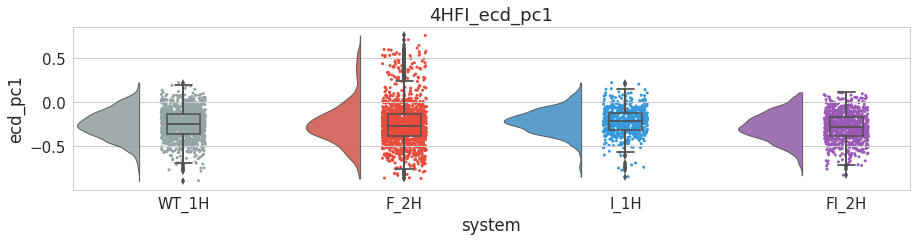

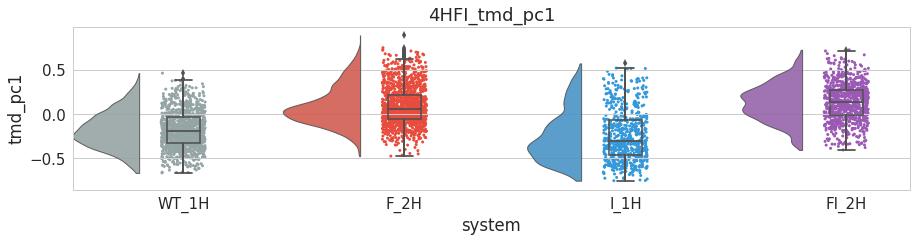

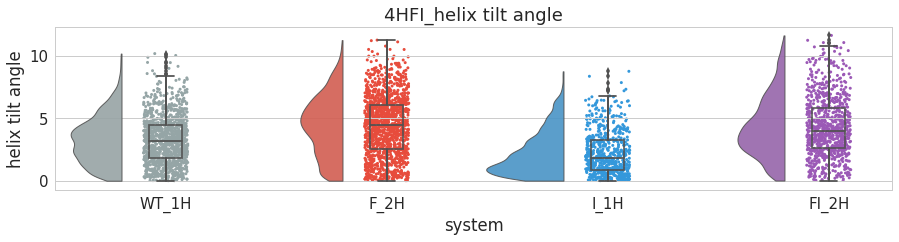

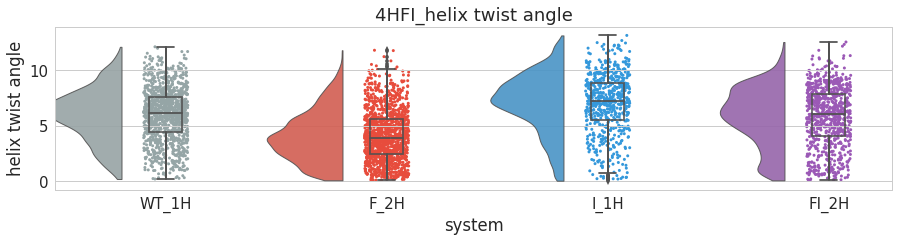

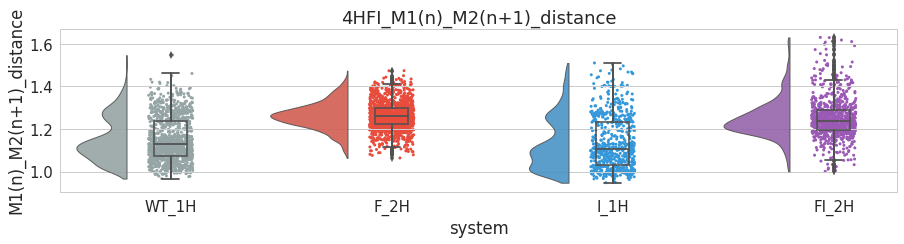

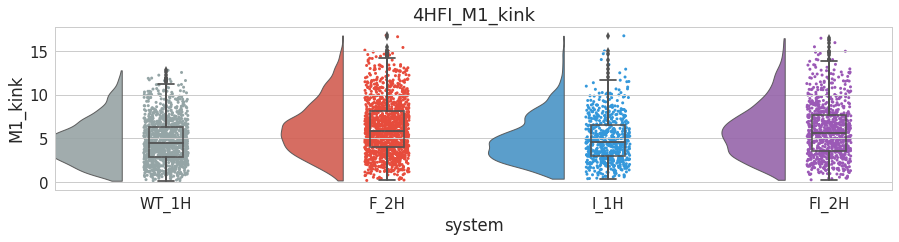

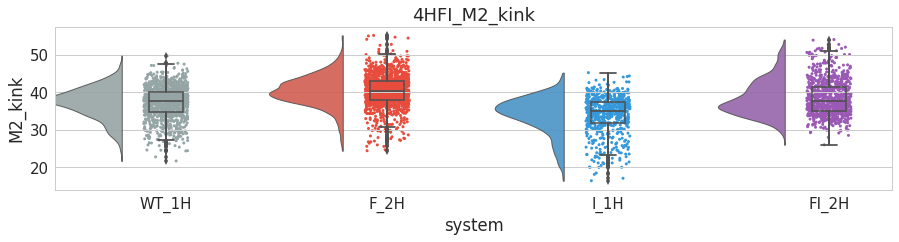

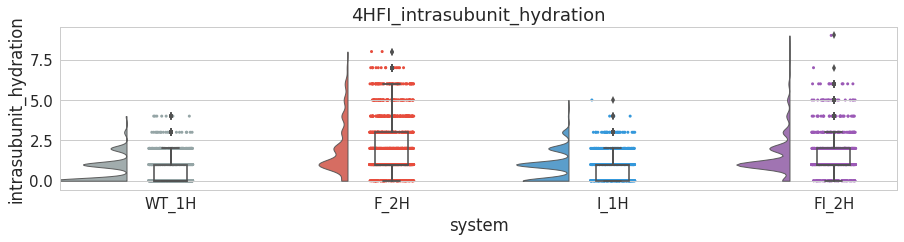

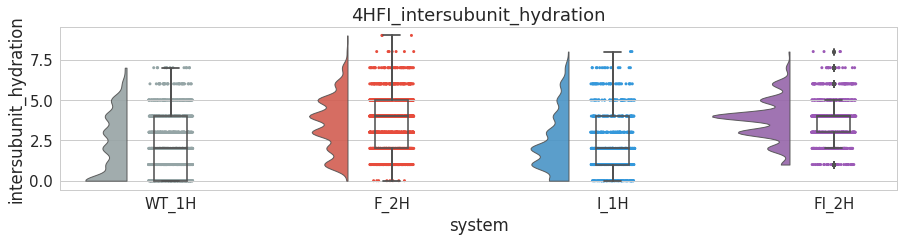

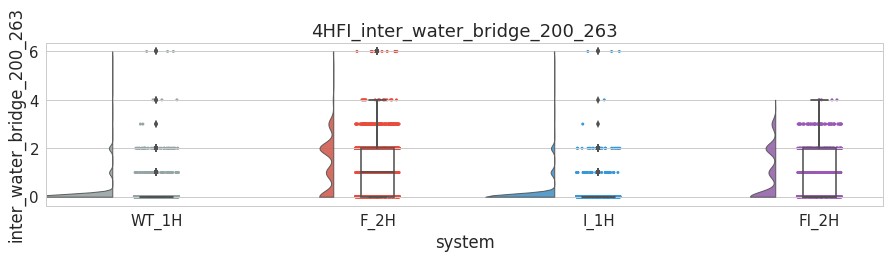

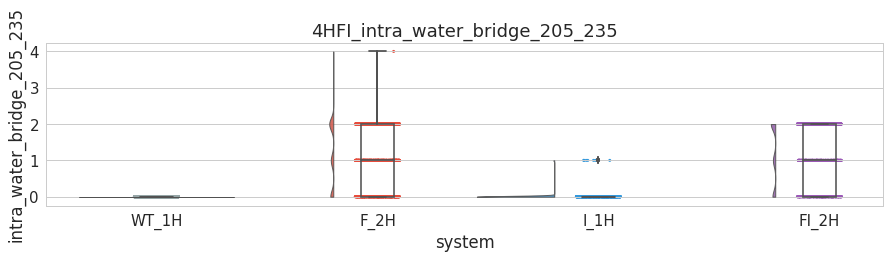

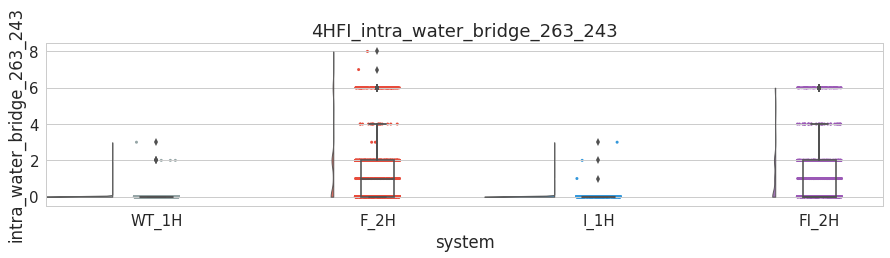

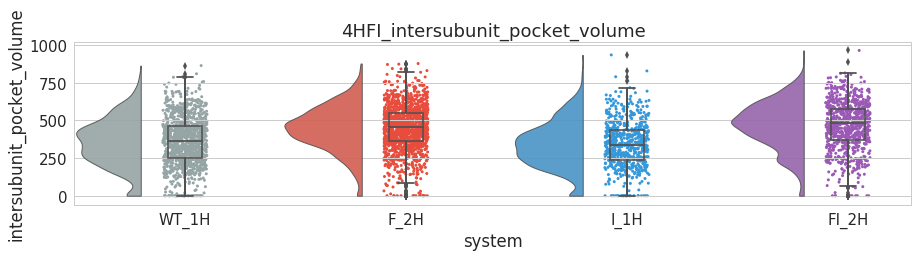

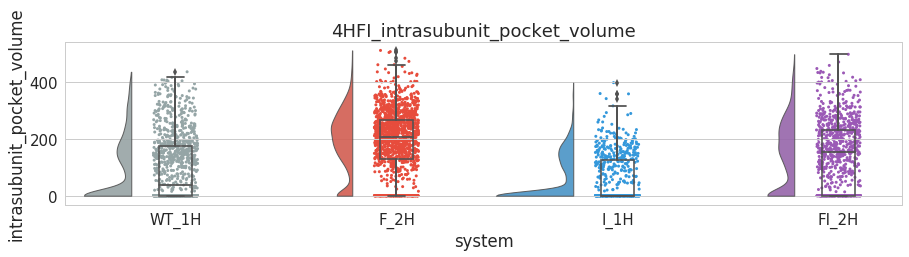

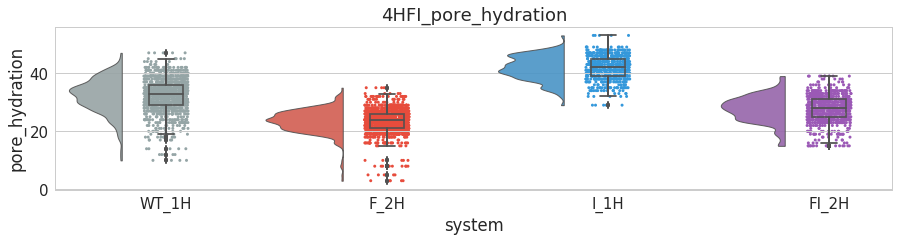

In [180]:
for feature in md_data.columns[6:]:
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.set_title('4HFI_' + feature)
    pt.RainCloud(x = 'system', y = feature, data = md_data[md_data.traj_time>30],  
        palette = sns.color_palette(glic_palettes), bw = .2,width_viol = .7,ax=ax,alpha = 0.9,dodge = True,pointplot=False)
    ax.set_xticklabels(['WT_1H','F_2H','I_1H','FI_2H'])


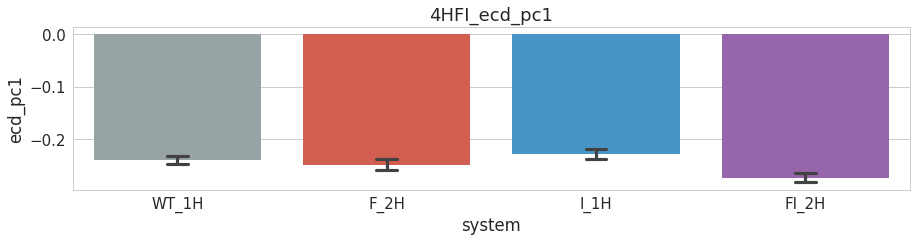

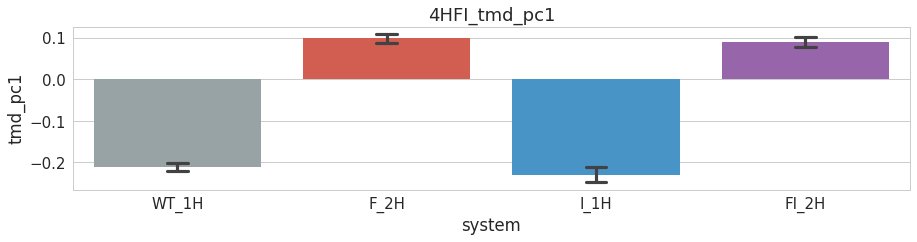

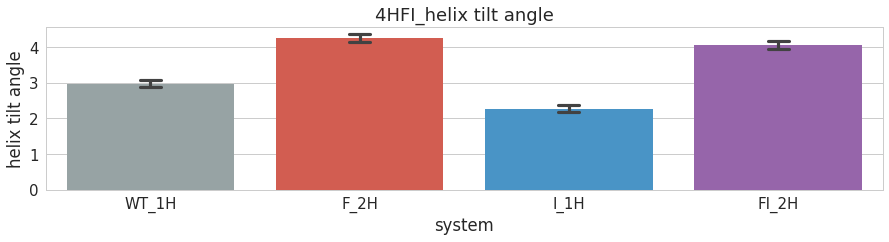

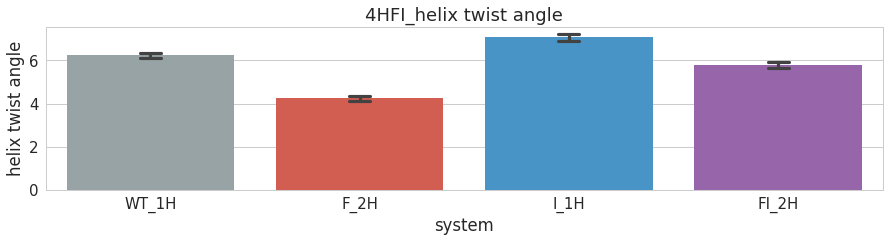

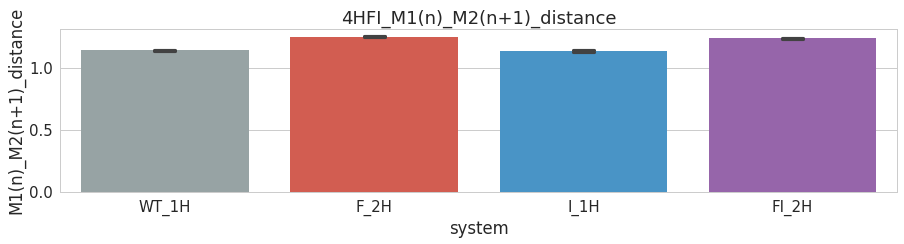

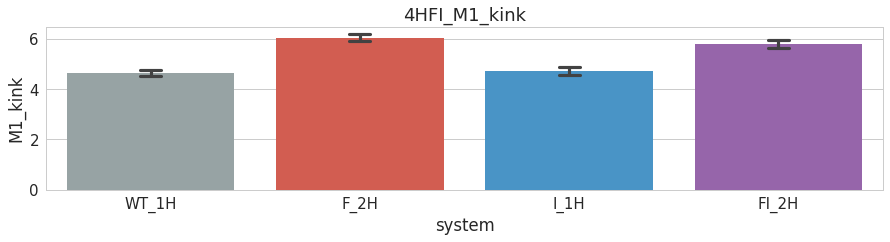

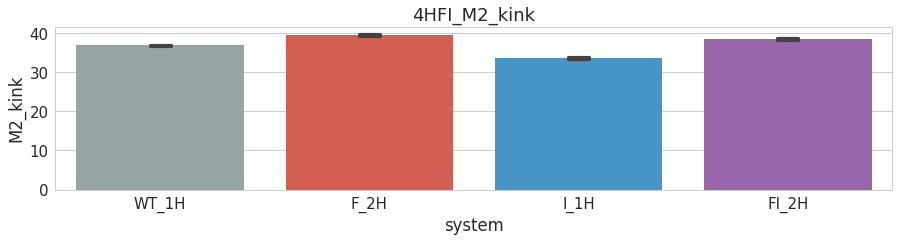

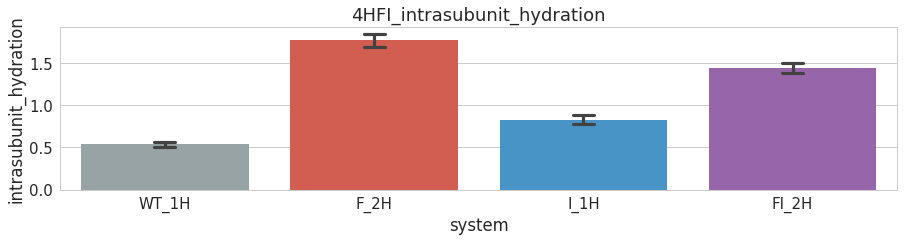

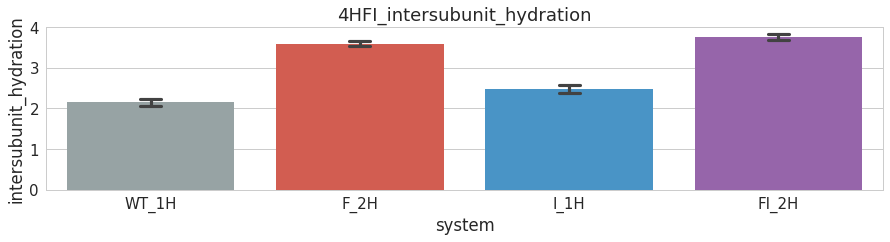

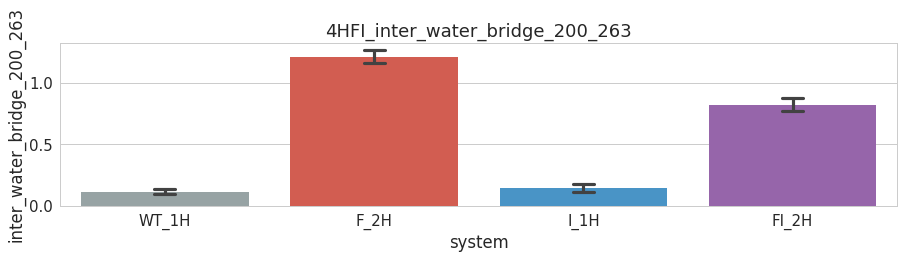

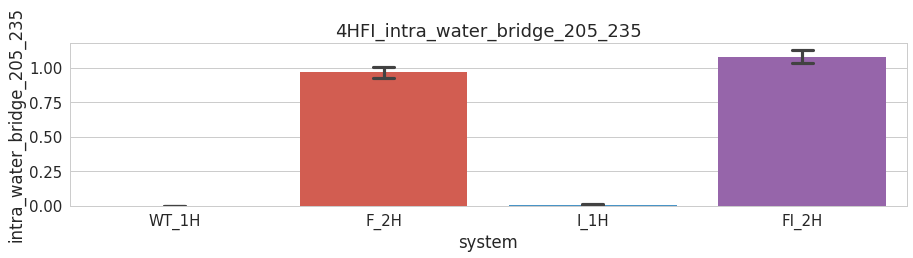

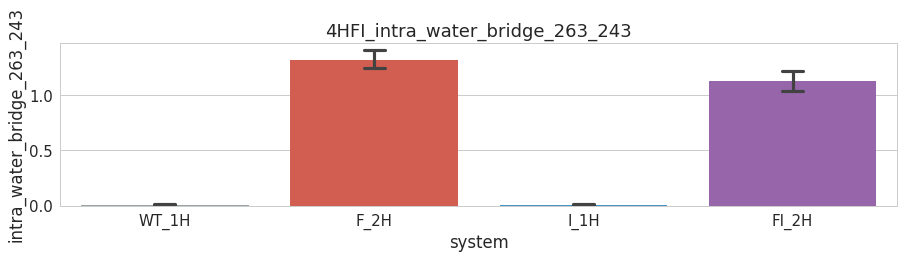

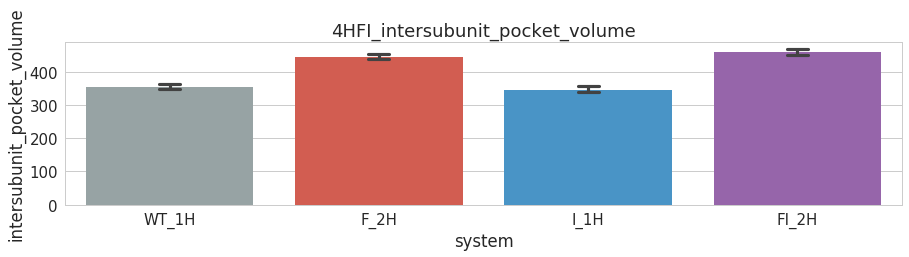

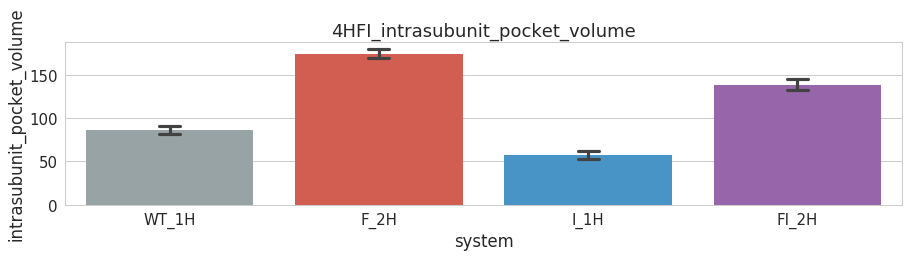

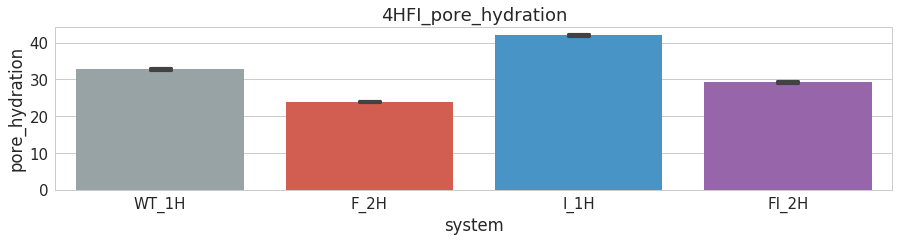

In [181]:
for feature in md_data.columns[6:]:
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.set_title('4HFI_' + feature)
    sns.barplot(x='system',y=feature,data=md_data,palette=glic_palettes,capsize=.1,)
    ax.set_xticklabels(['WT_1H','F_2H','I_1H','FI_2H'])


In [ ]:
for feature in inter_pocket_ensemble.columns:
    try:
        fig, ax = plt.subplots(figsize=(15, 3))
        ax.set_title('4HFI_inter_pocket_' + feature)
        pt.RainCloud(x = 'system', y = feature, data = inter_pocket_ensemble[inter_pocket_ensemble.pock_volume != 0],  
            palette = sns.color_palette(glic_palettes), bw = .2,width_viol = .7,ax=ax,alpha = 0.9,dodge = True,pointplot=False)
        ax.set_xticklabels(['WT_1H','F_2H','I_1H','FI_2H'])
        plt.show()
    except:
        ax.remove()
        print(feature + ' not plotable.')


In [ ]:
for feature in intra_pocket_ensemble.columns:
    try:
        fig, ax = plt.subplots(figsize=(15, 3))
        ax.set_title('4HFI_intra_pocket_' + feature)
        pt.RainCloud(x = 'system', y = feature, data = inter_pocket_ensemble[intra_pocket_ensemble.pock_volume != 0],  
            palette = sns.color_palette(glic_palettes), bw = .2,width_viol = .7,ax=ax,alpha = 0.9,dodge = True,pointplot=False)
        ax.set_xticklabels(['WT_1H','F_2H','I_1H','FI_2H'])
        plt.show()
    except:
        ax.remove()
        print(feature + ' not plotable.')
